In [1]:
from NeuralNet import NeuralNet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wdir = "/home/cosmocicatais/simpleMC/chains_bambi/"
chain_lcdm_hd = "LCDM_phy_HD_nested_dynesty_multi_1.txt"

In [3]:
data = np.loadtxt(wdir+chain_lcdm_hd)

In [4]:
samples = data[:,2:5]
likes = data[:,1]
len(likes)

14037

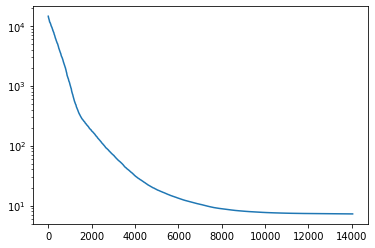

In [5]:
plt.plot(likes)
plt.yscale('log')

In [6]:
network = NeuralNet(samples, likes, [3,100, 100, 100, 100, 100, 1], epochs=300, batch_size=8, scale=[False, True])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [7]:
network.train()

Training...
Epoch 1/300
1404/1404 [==============================] - 1s 836us/step - loss: 2737485.4422 - val_loss: 2233339.5000
Epoch 2/300
1404/1404 [==============================] - 1s 653us/step - loss: 2815171.0877 - val_loss: 2129831.2500
Epoch 3/300
1404/1404 [==============================] - 1s 654us/step - loss: 2425649.5377 - val_loss: 2040103.8750
Epoch 4/300
1404/1404 [==============================] - 1s 663us/step - loss: 2383721.8628 - val_loss: 1746506.7500
Epoch 5/300
1404/1404 [==============================] - 1s 656us/step - loss: 1707292.2404 - val_loss: 340697.8438
Epoch 6/300
1404/1404 [==============================] - 1s 669us/step - loss: 249982.8146 - val_loss: 42170.7891
Epoch 7/300
1404/1404 [==============================] - 1s 669us/step - loss: 40193.8691 - val_loss: 27053.5527
Epoch 8/300
1404/1404 [==============================] - 1s 662us/step - loss: 33948.0906 - val_loss: 21339.2617
Epoch 9/300
1404/1404 [==============================] - 1s 659u

1404/1404 [==============================] - 1s 664us/step - loss: 1062.5561 - val_loss: 347.7939
Epoch 75/300
1404/1404 [==============================] - 1s 662us/step - loss: 1085.5557 - val_loss: 94.0591
Epoch 76/300
1404/1404 [==============================] - 1s 658us/step - loss: 4306.4280 - val_loss: 167.7455
Epoch 77/300
1404/1404 [==============================] - 1s 656us/step - loss: 939.8305 - val_loss: 11250.3574
Epoch 78/300
1404/1404 [==============================] - 1s 658us/step - loss: 1738.2351 - val_loss: 1229.6713
Epoch 79/300
1404/1404 [==============================] - 1s 660us/step - loss: 1037.5333 - val_loss: 310.8574
Epoch 80/300
1404/1404 [==============================] - 1s 661us/step - loss: 487.6144 - val_loss: 4890.9927
Epoch 81/300
1404/1404 [==============================] - 1s 658us/step - loss: 655.3991 - val_loss: 3333.5063
Epoch 82/300
1404/1404 [==============================] - 1s 666us/step - loss: 1086.5837 - val_loss: 532.6774
Epoch 83/300


1404/1404 [==============================] - 1s 657us/step - loss: 869.5645 - val_loss: 152.8732
Epoch 148/300
1404/1404 [==============================] - 1s 661us/step - loss: 5261.2969 - val_loss: 959.1265
Epoch 149/300
1404/1404 [==============================] - 1s 651us/step - loss: 1525.3978 - val_loss: 173.6476
Epoch 150/300
1404/1404 [==============================] - 1s 656us/step - loss: 211.2797 - val_loss: 489.8474
Epoch 151/300
1404/1404 [==============================] - 1s 656us/step - loss: 1155.0903 - val_loss: 616.7880
Epoch 152/300
1404/1404 [==============================] - 1s 665us/step - loss: 862.4079 - val_loss: 1797.3784
Epoch 153/300
1404/1404 [==============================] - 1s 658us/step - loss: 1085.4089 - val_loss: 123.8905
Epoch 154/300
1404/1404 [==============================] - 1s 658us/step - loss: 252.8230 - val_loss: 726.8215
Epoch 155/300
1404/1404 [==============================] - 1s 660us/step - loss: 438.5445 - val_loss: 86.3491
Epoch 156/3

1404/1404 [==============================] - 1s 665us/step - loss: 176.1562 - val_loss: 224.2105
Epoch 221/300
1404/1404 [==============================] - 1s 657us/step - loss: 1611.9709 - val_loss: 548.0228
Epoch 222/300
1404/1404 [==============================] - 1s 665us/step - loss: 516.5687 - val_loss: 212.2577
Epoch 223/300
1404/1404 [==============================] - 1s 664us/step - loss: 520.1179 - val_loss: 251.3344
Epoch 224/300
1404/1404 [==============================] - 1s 661us/step - loss: 1462.1161 - val_loss: 51.2125
Epoch 225/300
1404/1404 [==============================] - 1s 665us/step - loss: 627.9751 - val_loss: 175.8781
Epoch 226/300
1404/1404 [==============================] - 1s 660us/step - loss: 724.4226 - val_loss: 69.2692
Epoch 227/300
1404/1404 [==============================] - 1s 660us/step - loss: 442.2547 - val_loss: 338.5352
Epoch 228/300
1404/1404 [==============================] - 1s 661us/step - loss: 1394.2347 - val_loss: 1144.9878
Epoch 229/300

Epoch 294/300
1404/1404 [==============================] - 1s 664us/step - loss: 778.2058 - val_loss: 84.1672
Epoch 295/300
1404/1404 [==============================] - 1s 662us/step - loss: 568.2770 - val_loss: 95.1017
Epoch 296/300
1404/1404 [==============================] - 1s 668us/step - loss: 288.4181 - val_loss: 130.0979
Epoch 297/300
1404/1404 [==============================] - 1s 655us/step - loss: 2133.7297 - val_loss: 104.1637
Epoch 298/300
1404/1404 [==============================] - 1s 666us/step - loss: 683.8877 - val_loss: 137.2054
Epoch 299/300
1404/1404 [==============================] - 1s 664us/step - loss: 188.2951 - val_loss: 351.7523
Epoch 300/300
1404/1404 [==============================] - 1s 660us/step - loss: 329.3803 - val_loss: 393.0389
Training complete!


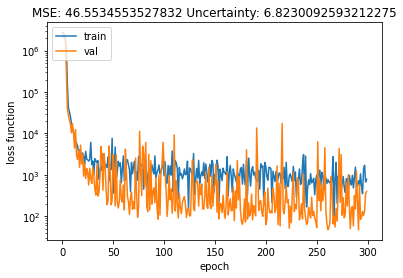

In [8]:
network.plot(ylogscale=True)

In [9]:
r = np.random.randint(len(likes)-1)
# r = np.argmin(likes)
test_sample = samples[r]

new_vector = np.array(test_sample).reshape(1,3)
# new_vector = np.array([0.7,0.5,0.5])
prediction = network.predict(new_vector)


print("Predicción: {}".format(float(prediction)))



Predicción: 7.435025215148926


In [10]:
likes[r], samples[r]

(7.268071046378013, array([0.32489448, 0.0220837 , 0.68105115]))

In [11]:
predictions = network.predict(samples)

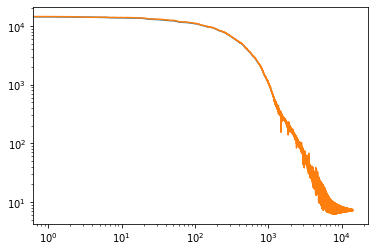

In [12]:
plt.plot(likes)
plt.plot(predictions)
plt.yscale('log')
plt.xscale('log')

In [14]:
network.save_model('hzlike', path='models')